Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking, Optim
gr(size=(600,600));

### snippet 2.6 (see `03/clip-01.jl` for explanations)

In [2]:
p_grid = range(0, step=0.001, stop=1)
prior = ones(length(p_grid))
likelihood = [pdf(Binomial(9, p), 6) for p in p_grid]
posterior = likelihood .* prior
posterior = posterior / sum(posterior)
samples = sample(p_grid, Weights(posterior), length(p_grid));
samples[1:5]

5-element Array{Float64,1}:
 0.569
 0.935
 0.644
 0.79 
 0.734

Compute the MAP (maximum_a_posteriori) estimate

In [3]:
x0 = [0.5]
lower = [0.0]
upper = [1.0]

function loglik(x)
  ll = 0.0
  ll += log.(pdf.(Beta(1, 1), x[1]))
  ll += sum(log.(pdf.(Binomial(9, x[1]), repeat([6], 1))))
  -ll
end

(qmap, opt) = quap(loglik, x0, lower, upper)

([0.6666666665925677], Results of Optimization Algorithm
 * Algorithm: Fminbox with Gradient Descent
 * Starting Point: [0.5]
 * Minimizer: [0.6666666665925677]
 * Minimum: 1.297811e+00
 * Iterations: 3
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 5.55e-08 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = 4.81e-14 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 2.27e-09 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 54
 * Gradient Calls: 54)

Show optimization results

In [4]:
opt

Results of Optimization Algorithm
 * Algorithm: Fminbox with Gradient Descent
 * Starting Point: [0.5]
 * Minimizer: [0.6666666665925677]
 * Minimum: 1.297811e+00
 * Iterations: 3
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 5.55e-08 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = 4.81e-14 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 2.27e-09 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 54
 * Gradient Calls: 54

Fit quadratic approcimation

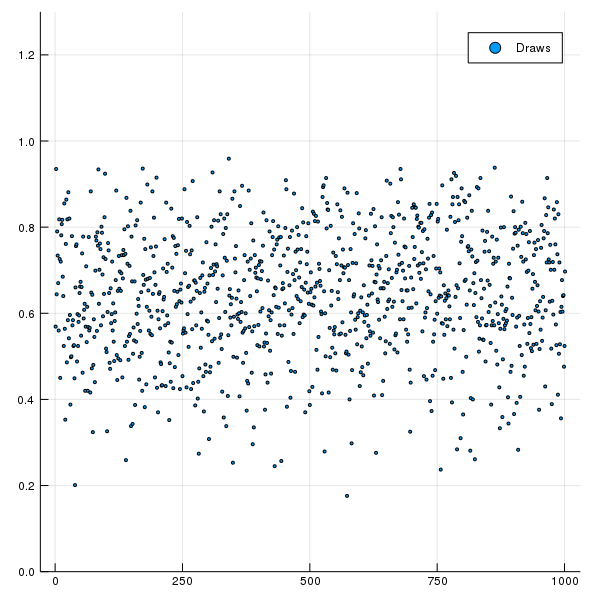

In [5]:
quapfit = [qmap[1], std(samples, mean=qmap[1])]

p = Vector{Plots.Plot{Plots.GRBackend}}(undef, 4)
p[1] = scatter(1:length(p_grid), samples, markersize = 2, ylim=(0.0, 1.3), lab="Draws")

analytical calculation

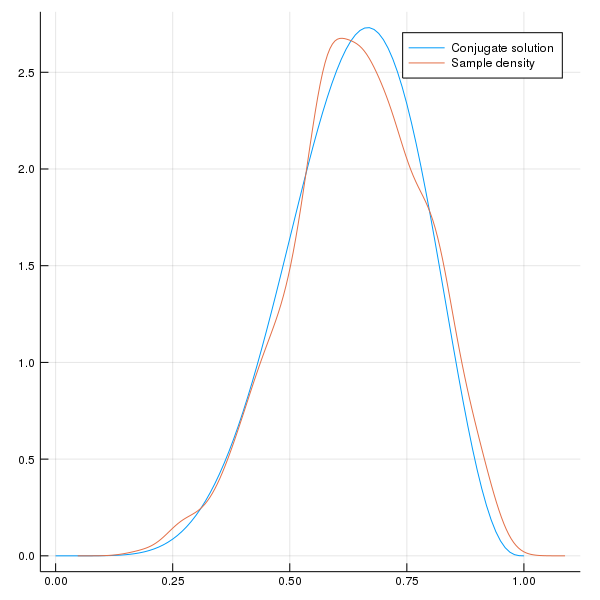

In [6]:
w = 6
n = 9
x = 0:0.01:1
p[2] = plot( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")
density!(p[2], samples, lab="Sample density")

quadratic approximation

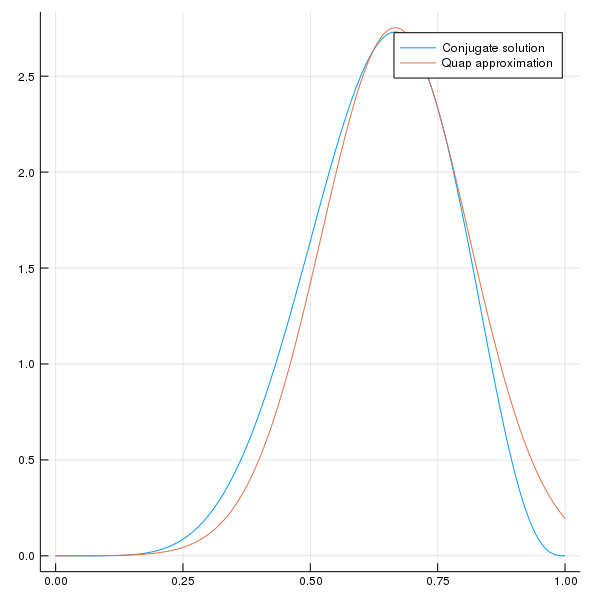

In [7]:
p[3] = plot( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")
plot!( p[3], x, pdf.(Normal( quapfit[1], quapfit[2] ) , x ), lab="Quap approximation")

### snippet 2.7
quadratic approximation

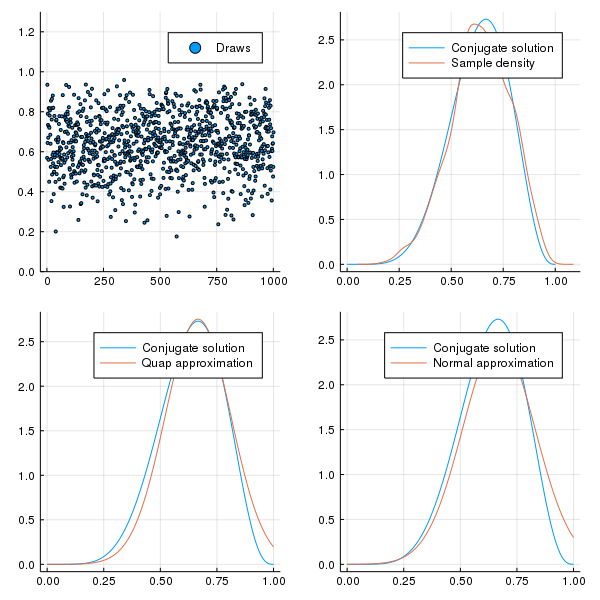

In [8]:
w = 6; n = 9; x = 0:0.01:1
p[4] = plot( x, pdf.(Beta( w+1 , n-w+1 ) , x ), lab="Conjugate solution")
plot!(p[4], x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")
plot(p..., layout=(2, 2))

End of `02/clip-06-07.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*